Import Libraries

In [ ]:
!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.6/107.7 GB disk)


In [ ]:
import os
import cv2
from ultralytics import YOLO
import glob
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load Dataset

In [ ]:
dataset_location = '/content/drive/MyDrive/Colab Notebooks/COS30049_CTIP_Assignment/Species_Detection_Model/YOLOv8 Dataset'

Load Trained YOLOv8 Model

In [ ]:
# Load the YOLOv8 model from the specified path
model = YOLO('/content/drive/MyDrive/Colab Notebooks/COS30049_CTIP_Assignment/Species_Detection_Model/best.pt')

Define Output Directory

In [ ]:
output_base_path = '/content/drive/MyDrive/Colab Notebooks/COS30049_CTIP_Assignment/Resnet_Dataset'
output_train_path = os.path.join(output_base_path, 'train')
output_valid_path = os.path.join(output_base_path, 'valid')
output_test_path = os.path.join(output_base_path, 'test')

# Create output directories if they don't exist
os.makedirs(output_train_path, exist_ok=True)
os.makedirs(output_valid_path, exist_ok=True)
os.makedirs(output_test_path, exist_ok=True)

Class Mapping

In [ ]:
# Define a dictionary to map class IDs to class names
class_mapping = {
    0: 'asian black hornbill',
    1: 'babbler',
    2: 'banded civet',
    3: 'banded langur',
    4: 'banded linsang',
    5: 'bay cat',
    6: 'bear cat',
    7: 'bearded pig',
    8: 'bird',
    9: 'blue banded pitta',
    10: 'bornean crested fireback',
    11: 'bornean ground cuckoo',
    12: 'bornean porcupine',
    13: 'bornean yellow muntjac',
    14: 'bulwer pheasant',
    15: 'clouded leopard',
    16: 'crested serpent eagle',
    17: 'dog',
    18: 'dove',
    19: 'emerald dove',
    20: 'great argus pheasant',
    21: 'ground squirrel',
    22: 'horse tail squirrel',
    23: 'human',
    24: 'kinabalu squirrel',
    25: 'leopard cat',
    26: 'long-tailed macaque',
    27: 'long-tailed porcupine',
    28: 'malayan civet',
    29: 'malayan weasel',
    30: 'marbled cat',
    31: 'maroon langur',
    32: 'masked palm civet',
    33: 'mice',
    34: 'mongoose',
    35: 'monitor lizard',
    36: 'moonrat',
    37: 'mousedeer',
    38: 'muntjac',
    39: 'orangutan',
    40: 'otter civet',
    41: 'palm civet',
    42: 'pangolin',
    43: 'pig-tailed macaque',
    44: 'pigeon',
    45: 'porcupine',
    46: 'rat',
    47: 'red muntjac',
    48: 'roughneck monitor lizard',
    49: 'roulroul',
    50: 'sambar deer',
    51: 'slow lorris',
    52: 'small-toothed palm civet',
    53: 'squirrel',
    54: 'sunbear',
    55: 'sunda pangolin',
    56: 'teledu',
    57: 'thick-spined porcupine',
    58: 'three-striped ground squirrel',
    59: 'treeshrew',
    60: 'tufted ground squirrel',
    61: 'white fronted langur',
    62: 'white-rumped shama',
    63: 'yellow-throated marten',
}


Run Inference & Crop Images

In [ ]:
test_set_loc = os.path.join(dataset_location, "test/images/")

# Randomly select a test image
import os, random
random_test_image = random.choice(os.listdir(test_set_loc))
print("Running inference on " + random_test_image)

# Run inference
pred = model.predict(source=os.path.join(test_set_loc, random_test_image), conf=0.4, overlap_mask=True)  # Use 'conf' instead of 'confidence'

# If you want to view predictions
pred_results = pred[0]  # Get results for the first image in the batch
print(pred_results)

Running inference on RCNX8830_JPG.rf.d4238455e0fbca1ba814dd6b82f06f36.jpg

image 1/1 /content/drive/MyDrive/Colab Notebooks/COS30049_CTIP_Assignment/Species_Detection_Model/YOLOv8 Dataset/test/images/RCNX8830_JPG.rf.d4238455e0fbca1ba814dd6b82f06f36.jpg: 800x800 (no detections), 2523.5ms
Speed: 51.0ms preprocess, 2523.5ms inference, 21.3ms postprocess per image at shape (1, 3, 800, 800)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'asian black hornbill', 1: 'babbler', 2: 'banded civet', 3: 'banded langur', 4: 'banded linsang', 5: 'bay cat', 6: 'bear cat', 7: 'bearded pig', 8: 'bird', 9: 'blue banded pitta', 10: 'bornean crested fireback', 11: 'bornean ground cuckoo', 12: 'bornean porcupine', 13: 'bornean yellow muntjac', 14: 'bulwer pheasant', 15: 'clouded leopard', 16: 'crested serpent eagle', 17: 'dog', 18: 'dove', 19: 'emerald dove', 20: 'great argus pheasant', 21: 'ground squirrel', 


image 1/1 /content/drive/MyDrive/Colab Notebooks/COS30049_CTIP_Assignment/Species_Detection_Model/YOLOv8 Dataset/test/images/RCNX1948_JPG.rf.272ba8ff1b55482d76d515efbea02855.jpg: 800x800 1 sunbear, 2443.6ms
Speed: 7.8ms preprocess, 2443.6ms inference, 16.6ms postprocess per image at shape (1, 3, 800, 800)


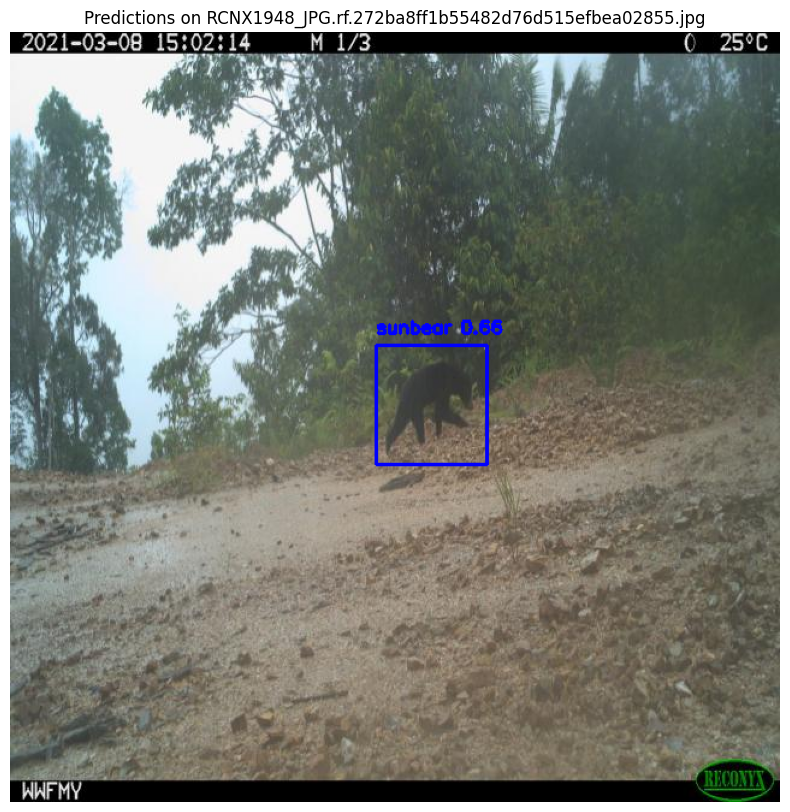

In [ ]:
# List all image files in the test set directory
test_images = [f for f in os.listdir(test_set_loc) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Select a random image from the test set
random_test_image = random.choice(test_images)

# Run inference on the randomly chosen image
pred = model.predict(source=os.path.join(test_set_loc, random_test_image), conf=0.4, overlap_mask=True)

# Read the image for processing
image = cv2.imread(os.path.join(test_set_loc, random_test_image))
image_with_predictions = image.copy()

# Access the boxes from the first element of the prediction output
boxes = pred[0].boxes  # This retrieves the boxes from the first image's results

# Access class names from the first element of the prediction output
class_names = pred[0].names  # This retrieves the class names mapping

# Process predictions and draw bounding boxes
for box in boxes.data:  # Iterate through the detected boxes
    if box.shape[0] == 6:  # Check if the box has the expected number of elements
        x1, y1, x2, y2, conf, class_id = box.tolist()

        # Draw bounding box on the image
        cv2.rectangle(image_with_predictions, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)

        # Add class label text
        class_name = class_names[int(class_id)]  # Use your class names mapping
        cv2.putText(image_with_predictions, f"{class_name} {conf:.2f}", (int(x1), int(y1) - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    else:
        print(f"Unexpected box shape: {box.shape}")

# Display the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_with_predictions, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f"Predictions on {random_test_image}")
plt.show()

Running inference on RCNX1948_JPG.rf.272ba8ff1b55482d76d515efbea02855.jpg

image 1/1 /content/drive/MyDrive/Colab Notebooks/COS30049_CTIP_Assignment/Species_Detection_Model/YOLOv8 Dataset/test/images/RCNX1948_JPG.rf.272ba8ff1b55482d76d515efbea02855.jpg: 800x800 1 sunbear, 1949.1ms
Speed: 21.0ms preprocess, 1949.1ms inference, 2.5ms postprocess per image at shape (1, 3, 800, 800)


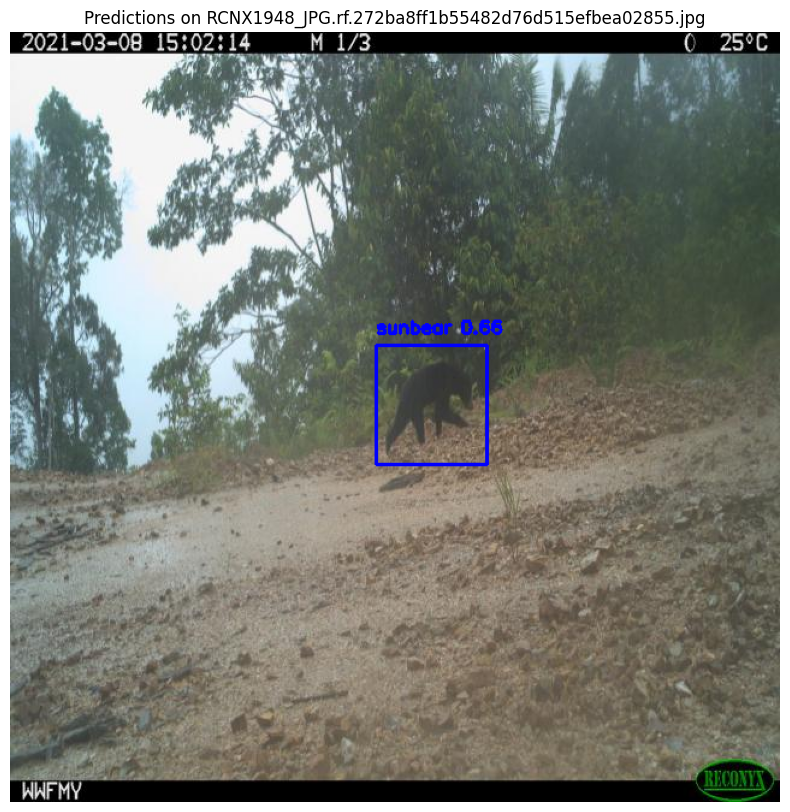

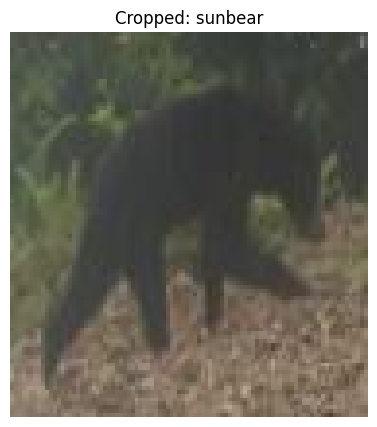

In [ ]:
print("Running inference on " + random_test_image)

# Run inference on the randomly chosen image
pred = model.predict(source=os.path.join(test_set_loc, random_test_image), conf=0.4, overlap_mask=True)  # Use 'conf' instead of 'confidence'

# Read the image for processing
image = cv2.imread(os.path.join(test_set_loc, random_test_image))
image_with_predictions = image.copy()

# List to store cropped images
cropped_images = []

# Check if predictions were returned
if pred and hasattr(pred[0], 'boxes'):
    boxes = pred[0].boxes  # Access boxes from the predictions

    # Process predictions and draw bounding boxes
    for box in boxes.data:  # Iterate through the detected boxes
        if box.shape[0] == 6:  # Check if the box has the expected number of elements
            x1, y1, x2, y2, conf, class_id = box.tolist()

            # Draw bounding box on the image
            cv2.rectangle(image_with_predictions, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)

            # Get class name from mapping
            class_name = pred[0].names[int(class_id)]  # Use class ID to get the class name

            # Add class label text
            cv2.putText(image_with_predictions, f"{class_name} {conf:.2f}", (int(x1), int(y1) - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

            # Crop the bounding box area from the original image
            cropped_image = image[int(y1):int(y2), int(x1):int(x2)]
            cropped_images.append((class_name, cropped_image))  # Store class name and cropped image
        else:
            print(f"Unexpected box shape: {box.shape}")

# Display the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_with_predictions, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f"Predictions on {random_test_image}")
plt.show()

# Display cropped images
for class_name, cropped_image in cropped_images:
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Cropped: {class_name}")
    plt.show()

Defining Directories

In [ ]:
# Define paths for train, validation, and test sets
train_image_files = glob.glob(os.path.join(dataset_location, 'train', 'images', '*.jpg'))
valid_image_files = glob.glob(os.path.join(dataset_location, 'valid', 'images', '*.jpg'))
test_image_files = glob.glob(os.path.join(dataset_location, 'test', 'images', '*.jpg'))

# Define base output path for saving cropped images
output_base_path = '/content/drive/MyDrive/Colab Notebooks/COS30049_CTIP_Assignment/Species_Detection_Model/Resnet_Dataset'
output_train_path = os.path.join(output_base_path, 'train')
output_valid_path = os.path.join(output_base_path, 'valid')
output_test_path = os.path.join(output_base_path, 'test')

# Ensure directories exist
os.makedirs(output_train_path, exist_ok=True)
os.makedirs(output_valid_path, exist_ok=True)
os.makedirs(output_test_path, exist_ok=True)

Functions to crop image

In [ ]:
# Function to validate and adjust bounding box coordinates if necessary
def validate_and_adjust_bbox(x1, y1, x2, y2, img_width, img_height):
    # Ensure coordinates are within image dimensions
    x1 = max(0, min(x1, img_width))
    y1 = max(0, min(y1, img_height))
    x2 = max(0, min(x2, img_width))
    y2 = max(0, min(y2, img_height))

    # Ensure the width and height are positive
    if x2 > x1 and y2 > y1:
        return True, x1, y1, x2, y2
    else:
        return False, x1, y1, x2, y2

# Function to run inference and save crops based on predictions or labels
def run_inference_and_save_crops(image_files, output_dir, label_folder):
    for image_path in image_files:
        # Load image
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error loading image: {image_path}")
            continue
        img_height, img_width, _ = image.shape

        # Get the corresponding label file
        label_path = image_path.replace('images', 'labels').replace('.jpg', '.txt')

        # Check if the label file exists
        if os.path.exists(label_path):
            with open(label_path, 'r') as label_file:
                labels = label_file.readlines()

            # Run YOLOv8 inference on the image
            pred = model.predict(source=image_path, conf=0.4, overlap_mask=True)

            # Check if detections were made
            if pred and hasattr(pred[0], 'boxes') and len(pred[0].boxes.data) > 0:
                # If YOLOv8 returns detections, use the bounding boxes but get the class from the label
                for i, (label, box) in enumerate(zip(labels, pred[0].boxes.data)):
                    if box.shape[0] == 6:  # Validate box format
                        class_id, x_center, y_center, width, height = map(float, label.split())

                        # Convert normalized coordinates to pixel coordinates (from the label file)
                        x1, y1, x2, y2 = convert_to_pixel_coords(x_center, y_center, width, height, img_width, img_height)

                        # Validate bounding box coordinates
                        valid_bbox, x1, y1, x2, y2 = validate_and_adjust_bbox(x1, y1, x2, y2, img_width, img_height)
                        if not valid_bbox:
                            print(f"Invalid bounding box for image: {image_path}")
                            continue

                        # Crop the bounding box area from the image
                        cropped_image = image[y1:y2, x1:x2]

                        # Get the class name from the label (using the provided class mapping)
                        class_name = class_mapping.get(int(class_id), f'class_{int(class_id)}')
                        class_folder = os.path.join(output_dir, class_name)

                        # Create class directory if it doesn't exist
                        os.makedirs(class_folder, exist_ok=True)

                        # Save cropped image with a unique name
                        cropped_image_path = os.path.join(class_folder, f"{os.path.basename(image_path).replace('.jpg', '')}_crop{i}.jpg")
                        cv2.imwrite(cropped_image_path, cropped_image)

                        print(f"Saved cropped image to: {cropped_image_path}")
            else:
                # If no detections from YOLOv8, rely entirely on the label file to crop
                for i, label in enumerate(labels):
                    class_id, x_center, y_center, width, height = map(float, label.split())

                    # Convert normalized coordinates to pixel coordinates (from the label file)
                    x1, y1, x2, y2 = convert_to_pixel_coords(x_center, y_center, width, height, img_width, img_height)

                    # Validate bounding box coordinates
                    valid_bbox, x1, y1, x2, y2 = validate_and_adjust_bbox(x1, y1, x2, y2, img_width, img_height)
                    if not valid_bbox:
                        print(f"Invalid bounding box for image: {image_path}")
                        continue

                    # Crop the bounding box area from the image
                    cropped_image = image[y1:y2, x1:x2]

                    # Get the class name from the label (using the provided class mapping)
                    class_name = class_mapping.get(int(class_id), f'class_{int(class_id)}')
                    class_folder = os.path.join(output_dir, class_name)

                    # Create class directory if it doesn't exist
                    os.makedirs(class_folder, exist_ok=True)

                    # Save cropped image with a unique name
                    cropped_image_path = os.path.join(class_folder, f"{os.path.basename(image_path).replace('.jpg', '')}_label_crop{i}.jpg")
                    cv2.imwrite(cropped_image_path, cropped_image)

                    print(f"Saved cropped image based on label to: {cropped_image_path}")
        else:
            print(f"Label file not found: {label_path}")

Running Inferences

In [ ]:
# Run inference on train, validation, and test sets
print("Running inference on train set...")
run_inference_and_save_crops(train_image_files, output_train_path, 'train/labels')

print("Running inference on validation set...")
run_inference_and_save_crops(valid_image_files, output_valid_path, 'valid/labels')

print("Running inference on test set...")
run_inference_and_save_crops(test_image_files, output_test_path, 'test/labels')

Streaming output truncated to the last 5000 lines.
image 1/1 /content/drive/MyDrive/Colab Notebooks/COS30049_CTIP_Assignment/Species_Detection_Model/YOLOv8 Dataset/train/images/RCNX0905_JPG.rf.94ae66908313c069dbc787d036027aca.jpg: 800x800 2 mousedeers, 1021.5ms
Speed: 8.4ms preprocess, 1021.5ms inference, 2.4ms postprocess per image at shape (1, 3, 800, 800)
Saved cropped image to: /content/drive/MyDrive/Colab Notebooks/COS30049_CTIP_Assignment/Species_Detection_Model/Resnet_Dataset/train/mousedeer/RCNX0905_JPG.rf.94ae66908313c069dbc787d036027aca_crop0.jpg
Saved cropped image to: /content/drive/MyDrive/Colab Notebooks/COS30049_CTIP_Assignment/Species_Detection_Model/Resnet_Dataset/train/mousedeer/RCNX0905_JPG.rf.94ae66908313c069dbc787d036027aca_crop1.jpg

image 1/1 /content/drive/MyDrive/Colab Notebooks/COS30049_CTIP_Assignment/Species_Detection_Model/YOLOv8 Dataset/train/images/RCNX0891_JPG.rf.caa89f7b06ae0a3d62ed48cd526e916c.jpg: 800x800 1 long-tailed macaque, 1023.2ms
Speed: 9.4ms p